In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

infection_df = pd.read_csv('Newman-SIR50-1mil-GS10-AD5-C04.csv')
infection_df['InfectionProbability'] = infection_df['InfRate'] / 10000  # add extra column with InfectionProbability
grouped_df = infection_df.groupby(by=['InfRate'])  # group the df by infection rate
res = infection_df.groupby("InfectionProbability")["NumInfected"].quantile([0.05, 0.95]).unstack(level=1)
infection_df.loc[((res.loc[infection_df.InfectionProbability, 0.05] < infection_df.NumInfected.values) 
                  & (infection_df.NumInfected.values < res.loc[infection_df.InfectionProbability, 0.95])).values]
grouped_df = infection_df.loc[((res.loc[infection_df.InfectionProbability, 0.05] < infection_df.NumInfected.values) 
                               & (infection_df.NumInfected.values < res.loc[infection_df.InfectionProbability, 0.95])).values]



In [71]:
grouped_df = grouped_df[['InfectionProbability', 'NumInfected']]
grouped_df = grouped_df.groupby('InfectionProbability').mean()

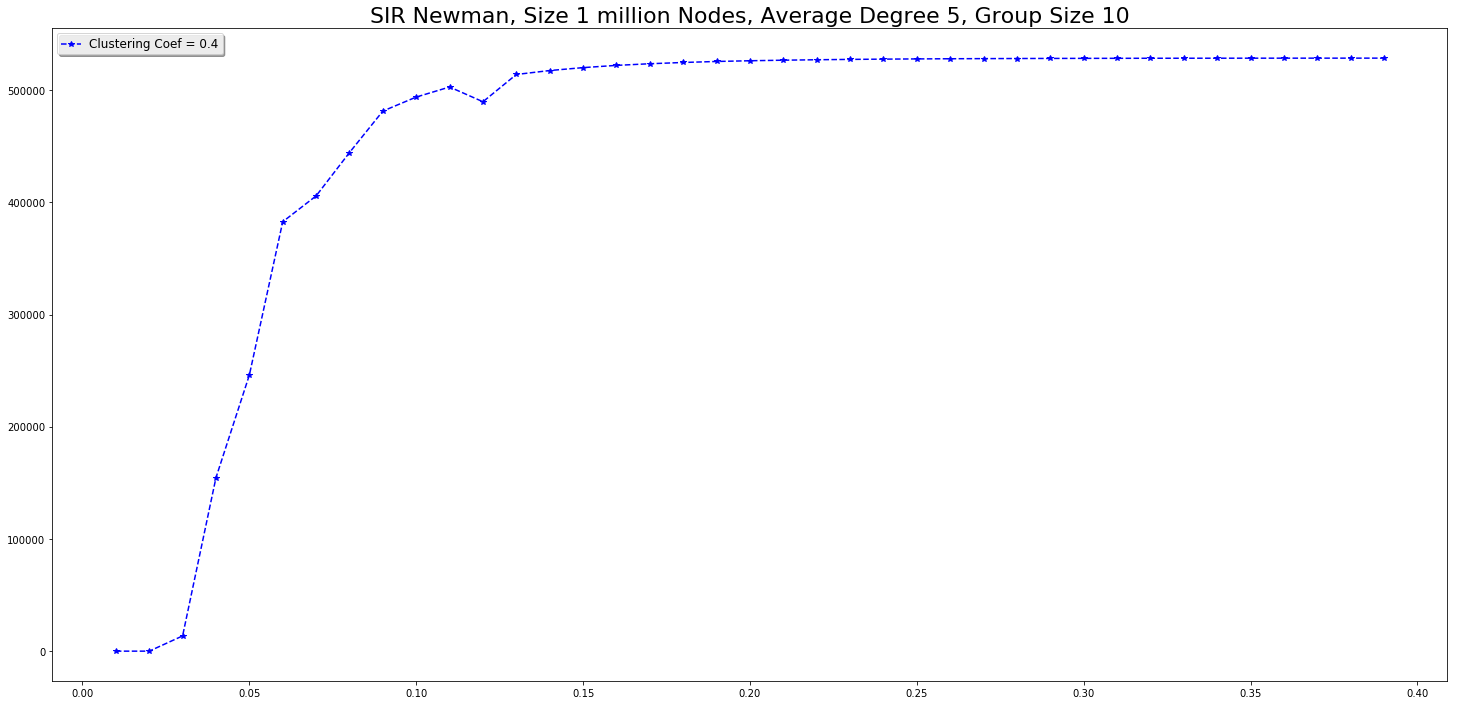

In [72]:
mp.figure(figsize=(25,12))
mp.title('SIR Newman, Size 1 million Nodes, Average Degree 5, Group Size 10', fontsize=22)

mp.plot(grouped_df, 'b*--', label='Clustering Coef = 0.4')


legend = mp.legend(loc='upper left', shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)
mp.show()